#
<div align=left>
    <img src="https://unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg" width=120 height=120>
</div>
<font size=5 color=k><strong>Aluno:</strong> Heitor Teixeira

<strong>Disciplina:</strong> Ciência de dados

<strong>Professor:</strong> Rilder Pires 

<strong>Assunto:</strong> Análise exploratória de dados tabulares

<strong>Título:</strong> Previsão da geração de energia solar com base em dados climáticos


## <font color=purple> Observações

<font color=k> Por se tratar de um trabalho acadêmico, este projeto contém muitos comentários e células que podem ser considerados desnecessários. Tentei detalhar ao máximo cada linha de código para melhor entendimento de todos.

## <div style="color: purple">Resumo </div>


###
<div style="color: blue">

Importância do tema escolhido

Objetivo

Metodologia
</div>

<div style= "margin-left: 50px">

-Aquisição dos dados;

-Análise exploratória;

-Limpeza dos dos dados;

-Escolha dos modelos;

-Treinamento.

</div>

<div style="color: red">

Resultados.... (in progress)

Conclusões.... (in progress)</div>

<font color=k>

#### Previsão da geração de energia solar com base em dados climáticos

A energia solar é uma fonte renovável de energia, porém, essaa geração de energia é altamente dependente de fatores climáticos como cobertura de nuvens, umidade, temperatura e velocidade do vento.

#### Objetivo

O trabalho tem como objetivo desenvolver um modelo de previsão da quantidade de energia solar que será gerada em um determinado dia com base em uma série de dados climáticos. Utilizando algoritmos e bibliotecas própria de ML, espera-se criar um modelo que possa prever com um grau de tolerância adequado a quantidade de energia solar que pode ser produzida em um determinado dia.

#### Metodologia

Será utilizado um conjunto de dados climáticos com atributos como cobertura de nuvens, umidade, temperatura, temperatura máxima, temperatura mínima, velocidade do vento, etc. Utilizando algumas bibliotecas de gráficos e organização de dados como <strong>pandas, matplotlib</strong> e <strong>seaborn</strong> será plotado gráficos para análise dos dados. Com base nessa análise, será feita a limpeza dos dados e a escolha dos atributos mais relevantes para treinamento dos modelos. Para a divisão dos dados entre treino e teste e treinamento foi utilizado a biblioteca <strong>sklearn</strong>

#### Impacto na sociedade

Eficiência na distribuição de energia, Estabilidade da rede, redução de custos, incentivo a adoção do uso dessa energia, etc.


## <font color='purple'> Bibliotecas

In [1]:
# Bibliotecas padrão e utilitários
from datetime import datetime, timedelta

# Bibliotecas para análise e manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de pré-processamento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Modelos de regressão
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Importações personalizadas
from senhas import api_key


## <font color='purple'> Importando dados

### <font color=blue>Api / Apache Airflow

<img src='https://www.visualcrossing.com/sharedcontent/uploads/2020/03/WordPressLogo-StandardGrayCircle250-2.png' width=120 height=120>
<img src='https://global-uploads.webflow.com/6203daf47137054c031fa0e6/64c4e08a42e4ed51cf703654_airflow_transparent-p-500.png' width=100 height=100>


<font size=5>https://www.visualcrossing.com/

http://0.0.0.0:8080

### <font color=blue>Algoritmo utilizado

In [2]:
cidades =['fortaleza','caucaia','aquiraz','sobral', 'natal', 'recife', 'aracaju', 'guaramiranga']

# ano = 365
# data_inicio = datetime.today() - timedelta(ano*20)
# data_fim = datetime.today()
# key = api_key

# # formatando a data para ser aceita no link da api
# data_inicio = data_inicio.strftime('%Y-%m-%d')
# data_fim = data_fim.strftime('%Y-%m-%d')


In [3]:
# # script para coletar os dados todas as cidades com a url da api
# for cidade in cidades:
#     URL = f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{cidade}/{data_inicio}/{data_fim}?unitGroup=metric&include=days&key={key}&contentType=csv'
#     dados = pd.read_csv(URL)
#     dados.to_csv(f'{cidade}_dados_brutos.csv', index=False)


### <font color=blue> Concatenando os dados

In [4]:
dataset_total = pd.DataFrame()

# juntando os arquivos de todas as cidades e criando uma coluna a mais para chamada mais fácil da cidade desejada
for cidade in cidades:
    dados_cidade = pd.read_csv(f'{cidade}_dados_brutos.csv')
    dados_cidade['cidade'] = cidade
    dataset_total = pd.concat([dataset_total, dados_cidade], ignore_index=True)

dataset_total.to_csv('dataset_total.csv', index=False)


In [5]:
dados = pd.read_csv('dataset_total.csv')

In [6]:
dados.shape

(58408, 34)

## <font color=purple> Treinamentos

### <font color=blue> Pré-processamento dos dados

In [7]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(dados[['icon']])

one_hot_encoded = encoder.transform(dados[['icon']])
colunas_encoded = encoder.get_feature_names_out(['icon'])

df_encoded = pd.DataFrame(one_hot_encoded, columns=colunas_encoded)

dados = pd.concat([dados, df_encoded], axis=1)

/home/heitor/anaconda3/envs/heitor-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
print(dados.shape)


nan = dados.isna().sum()

print(nan)

(58408, 40)
name                          0
datetime                      0
tempmax                     318
tempmin                     318
temp                        318
feelslikemax                318
feelslikemin                318
feelslike                   318
dew                         319
humidity                    318
precip                     4518
precipprob                  318
precipcover                   0
preciptype                39727
snow                      53178
snowdepth                 54478
windgust                  51869
windspeed                     0
winddir                     333
sealevelpressure           3978
cloudcover                  318
visibility                 1026
solarradiation            18024
solarenergy               18024
uvindex                   18024
severerisk                53168
sunrise                       0
sunset                        0
moonphase                     0
conditions                  318
description                 

In [9]:
remover_colunas = ['snow', 'snowdepth', 'moonphase', 'uvindex', 'solarradiation', 'feelslikemax', 'feelslikemin', 'feelslike', 'windgust','severerisk', 'precip', 'precipprob','precipcover', 'preciptype']

# removendo os atributos que não queremos
dados_limpos = dados.drop(columns=remover_colunas).select_dtypes(include=[np.number]).dropna()

nan = dados_limpos.isna().sum()

print(nan)

# dados_limpos.dropna(inplace=True)

print(dados_limpos.shape)


tempmax                   0
tempmin                   0
temp                      0
dew                       0
humidity                  0
windspeed                 0
winddir                   0
sealevelpressure          0
cloudcover                0
visibility                0
solarenergy               0
icon_clear-day            0
icon_cloudy               0
icon_partly-cloudy-day    0
icon_rain                 0
icon_wind                 0
icon_nan                  0
dtype: int64
(39662, 17)


In [10]:
dados_limpos = dados_limpos[dados_limpos['solarenergy'] != 0]
print(dados_limpos.shape)

(39654, 17)


In [11]:
# definindo o que vai ser atributo e label
atributos = dados_limpos.drop('solarenergy', axis=1)
label = dados_limpos['solarenergy']

scaler = MinMaxScaler()

# normalizando os atributos
atributos_normalizados = pd.DataFrame(scaler.fit_transform(atributos), columns=atributos.columns)

print(atributos_normalizados)


        tempmax   tempmin      temp       dew  humidity  windspeed   winddir  \
0      0.548544  0.892857  0.692913  0.832512  0.677966   0.060209  0.273335   
1      0.461165  0.821429  0.606299  0.832512  0.744350   0.067081  0.323767   
2      0.388350  0.785714  0.535433  0.857143  0.846045   0.072971  0.355809   
3      0.548544  0.857143  0.685039  0.837438  0.690678   0.072971  0.264419   
4      0.548544  0.892857  0.700787  0.832512  0.679379   0.078861  0.290889   
...         ...       ...       ...       ...       ...        ...       ...   
39649  0.597087  0.935714  0.787402  0.837438  0.607345   0.096859  0.270549   
39650  0.548544  0.925000  0.755906  0.837438  0.634181   0.109620  0.291725   
39651  0.597087  0.925000  0.771654  0.817734  0.597458   0.115510  0.266648   
39652  0.548544  0.925000  0.748031  0.817734  0.614407   0.078861  0.259125   
39653  0.766990  0.746429  0.716535  0.714286  0.552260   0.078861  0.238785   

       sealevelpressure  cloudcover  vi

In [12]:
# dividindo o conjunto em 2 - treino x teste
X_train, X_test, y_train, y_test = train_test_split(atributos, label, test_size=0.2, random_state=7)

y_test.unique()

array([19.6, 25. , 28.3, 27.4, 21.9, 26.9, 27.2, 26. , 24.1, 21.3, 26.8,
       27.8, 23.1, 22.2, 26.6, 23.3, 15.4, 24.3, 27.6, 22.9, 22. , 27.1,
       13.7, 24.5, 20.4, 25.1, 22.7, 20.6, 28.1, 21.4, 19.9, 17. , 20.2,
       26.3, 16.6, 23.6, 24.8, 26.1, 17.5, 18.6, 24.6, 17.2, 25.6, 19.4,
       22.5, 26.2, 25.2, 25.8, 19.8, 17.4, 28.2, 26.7, 24.7, 21.2, 13.8,
       20.9, 27. , 23. , 23.8, 25.9, 23.5, 17.7, 25.7, 21.1, 25.3, 19.5,
       21.7, 23.7, 25.4, 20.5, 20.1, 23.9, 23.4, 17.6, 24.2, 27.3, 16.8,
       25.5, 17.9, 24.4, 22.8, 16. , 19.2, 26.5, 19.1, 24.9, 20.3, 11.6,
       23.2, 27.7,  9.3, 19.3, 15. , 21. , 18.3, 22.3,  7.3, 11.7, 21.5,
       22.1, 14.8, 12.1, 20.7, 28.5, 16.1, 18.9, 14.6, 10.6, 13.2, 26.4,
       13.6, 24. , 20. , 19.7, 28.9, 16.4, 17.8, 21.6, 27.9, 28.4, 22.4,
       11.8, 22.6, 18.1, 14.3, 13.5, 11.5, 14.9, 27.5, 12.8, 11.3, 21.8,
       18.4, 18. , 11. ,  7.5, 11.1, 15.8, 20.8, 13.4, 18.8, 28. , 16.7,
       12.5, 10. , 17.1, 10.4, 15.1, 17.3, 19. ,  5

### <font color=blue> Classe Treinamento

In [13]:
class Treinamento:
    def __init__(self, modelo, param_grid, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
        self.modelo = modelo
        self.param_grid = param_grid
        self.grid_search = GridSearchCV(estimator=self.modelo, param_grid=self.param_grid)
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        self.treinar()
        self.mse, self.r2, self.mae, self.mape = self.avaliar()
        print(f'MSE: {self.mse: .4f}')
        print(f'R²: {self.r2: .4f}')
        print(f'MAE: {self.mae: .4f}')
        print(f'MAPE: {self.mape: .4f}')
        self.plotar()
        

    def treinar(self):
        self.grid_search.fit(self.X_train, self.y_train)
        
    def avaliar(self):
        y_pred = self.grid_search.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        mae = mean_absolute_error(self.y_test, y_pred)
        mape = np.mean(np.abs((self.y_test - y_pred) / self.y_test)) * 100

        return mse, r2, mae, mape

    def plotar(self):
        y_pred = self.grid_search.predict(self.X_test)
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_pred, color='lightblue')
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()],'k', lw=2)
        plt.xlabel('Real')
        plt.ylabel('Predito')
        plt.title(f'{self.modelo.__class__.__name__} - Real vs Predito')
        plt.xlim(0, self.y_test.max())
        plt.show()
        
    def metricas(self):
        return [self.mse, self.r2, self.mae, self.mape]


### <font color=blue> Linear regression

MSE:  12.2857
R²:  0.3316
MAE:  2.6972
MAPE:  14.1817


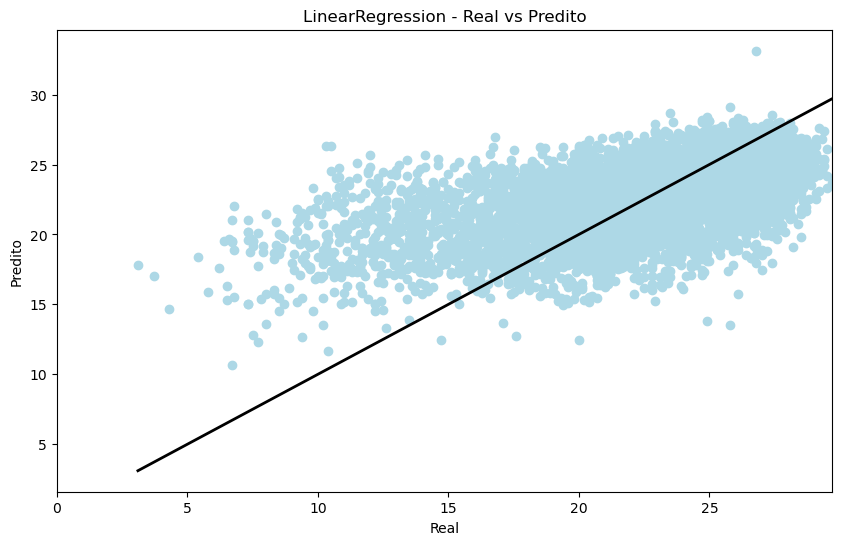

In [14]:
metricas = []

param_grid = {
    'fit_intercept': [True, False],
}

modelo = LinearRegression()
treinamento = Treinamento(modelo, param_grid)
metricas_linear_regression = treinamento.metricas()
metricas.append(metricas_linear_regression)


### <font color=blue> Decision tree

In [15]:
metricas = []

MSE:  11.6934
R²:  0.3638
MAE:  2.5151
MAPE:  13.1646


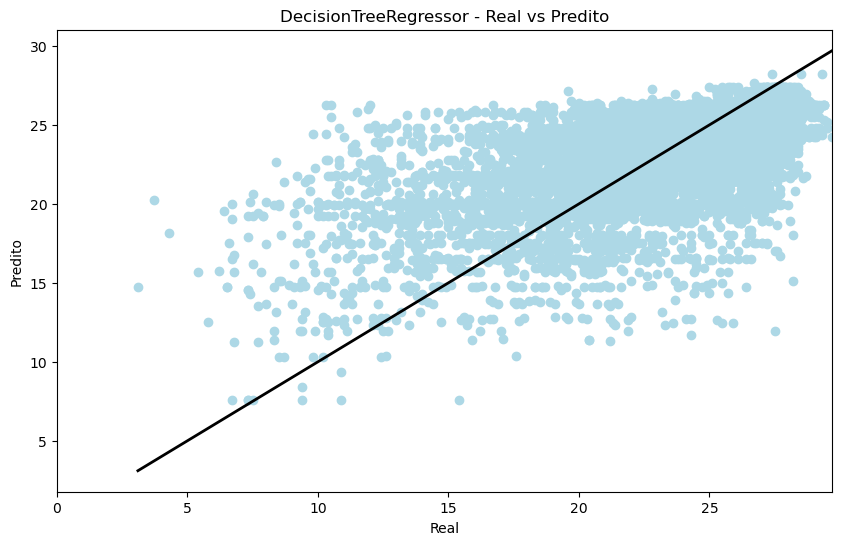

In [ ]:


param_grid = {
    'max_depth': [None, 10, 20, 30, 50, 75],
    'min_samples_split': [2, 5, 10, 25],
    'min_samples_leaf': [1, 2, 4, 5]
}

modelo = DecisionTreeRegressor()
treinamento = Treinamento(modelo, param_grid)
metricas_decision_tree = treinamento.metricas()
metricas.append(metricas_decision_tree)


### <font color=blue> Ridge Regression

MSE:  12.2859
R²:  0.3316
MAE:  2.6972
MAPE:  14.1820


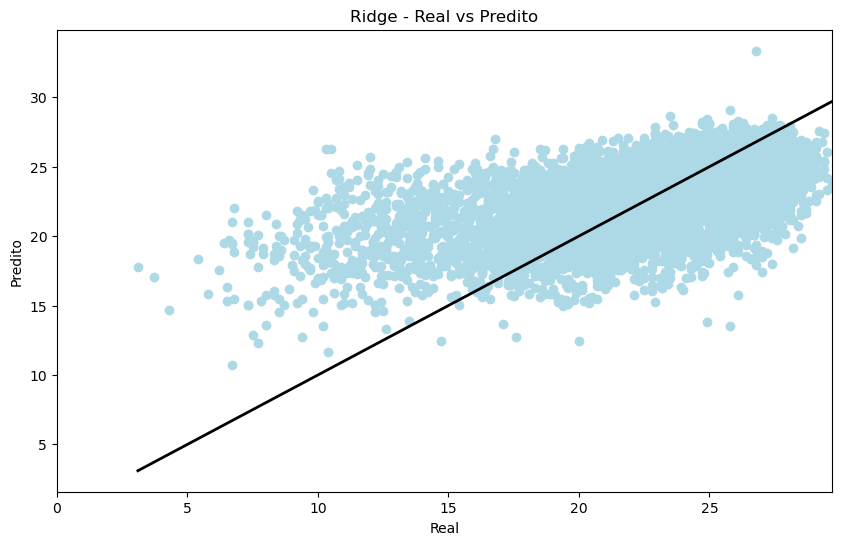

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

modelo = Ridge()
treinamento = Treinamento(modelo, param_grid)
metricas_decision_tree = treinamento.metricas()
metricas.append(metricas_decision_tree)

### <font color=blue> Lasso Regression

MSE:  12.2981
R²:  0.3309
MAE:  2.6992
MAPE:  14.2009


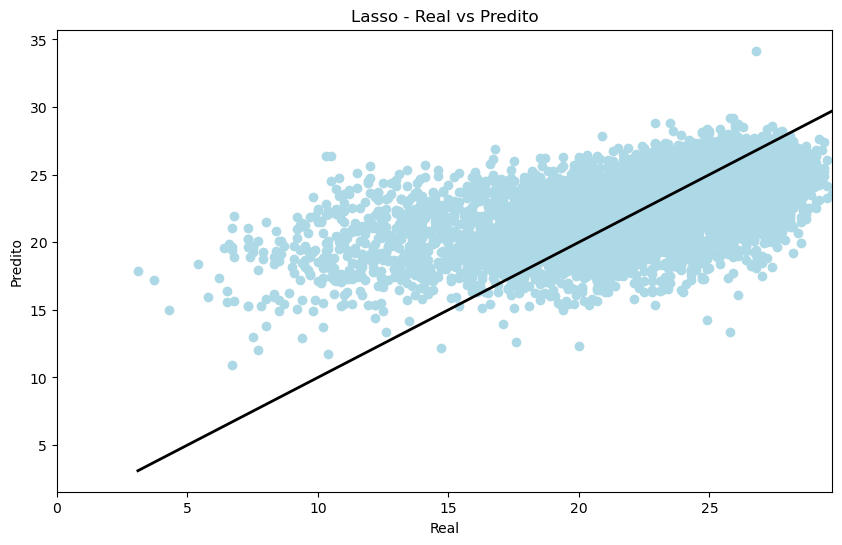

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    
}

modelo = Lasso()
treinamento = Treinamento(modelo, param_grid)
metricas_decision_tree = treinamento.metricas()
metricas.append(metricas_decision_tree)

### <font color=blue>  Bayesian Ridge

MSE:  12.2864
R²:  0.3315
MAE:  2.6973
MAPE:  14.1835


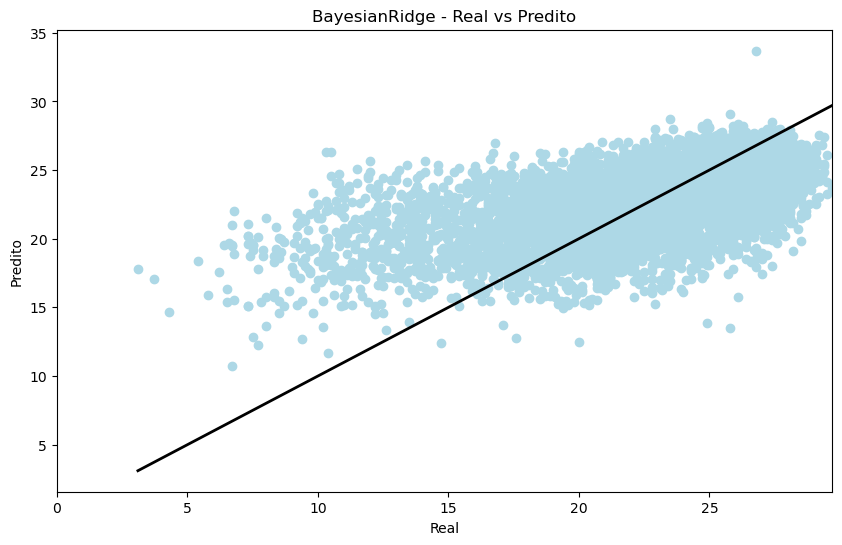

In [ ]:
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

modelo = BayesianRidge()
treinamento = Treinamento(modelo, param_grid)
metricas_random_forest = treinamento.metricas()
metricas.append(metricas_random_forest)

### <font color=blue>  Support vector regression

In [19]:

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 25],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

modelo = SVR()
treinamento = Treinamento(modelo, param_grid)
metricas_svr = treinamento.metricas()
metricas.append(metricas_svr)


### <font color=blue>  Random Forest

MSE:  7.0197
R²:  0.6181
MAE:  1.8461
MAPE:  9.6276


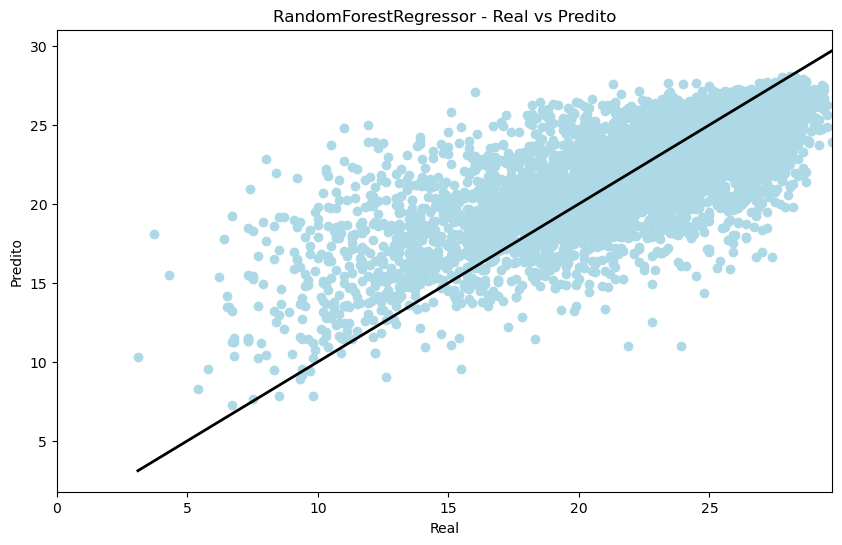

In [18]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [10, 20, 30, 50, 100, 150, 200],
}

modelo = RandomForestRegressor()
treinamento = Treinamento(modelo, param_grid)
metricas_random_forest = treinamento.metricas()
metricas.append(metricas_random_forest)



### <font color=blue>  MLP

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

modelo = MLPRegressor()
treinamento = Treinamento(modelo, param_grid)
metricas_mlp = treinamento.metricas()
metricas.append(metricas_mlp)


## <font color = purple> Resultados

In [ ]:
metricas_df = pd.DataFrame(metricas, columns=['MSE', 'R²', 'MAE', 'MAPE'])
metricas_df

In [ ]:
metricas_df.plot(kind='bar', figsize=(14, 7))
plt.xticks(ticks=range(len(metricas_df)))
plt.title('Comparação das Métricas dos Modelos')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.legend(title='Métrica')
plt.show()
